# Convolutional Nets - CIFAR 10 dataset

In this exercise I will gradually build a convolutional net for the CIFAR 10 datasets.

I will explore how adding additional layers or modifying the existing ones
affects the model accuracy. 

I will focus mostly on the neural net architecture and the model's hyperparameters
and not on the training parameters.  

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.datasets import cifar10 # type: ignore
import matplotlib.pyplot as plt

# Load and preprocess the dataset
# CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
# The dataset is divided into 50,000 training images and 10,000 test images.
# The classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.
# The images are represented as 32x32 pixel arrays with 3 color channels (RGB).

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 166s 1us/step


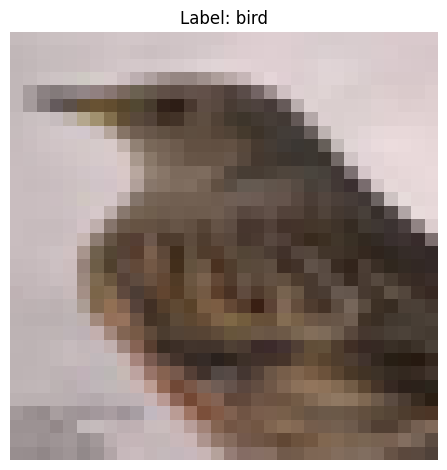

In [27]:
# Let's visualize some of the training images
# Of course they are not very clear due to their small size, but they are representative of the dataset.

class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',    
    'dog', 'frog', 'horse', 'ship', 'truck'
]
i = 18  # Index of the image to display
plt.imshow(x_train[i])
plt.title(f"Label: {class_names[y_train[i][0]]}")
plt.axis('off')
plt.tight_layout()
plt.show()

In [28]:
# Build a simple CNN model
model = models.Sequential([
    
    # we have a 3072 activation size
    layers.Input(shape=(32, 32, 3)),
    
    # output 32*32*32 = 32768
    # number of parameters (3*3*3+1)*32 = 896
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    
    # output 16*16*32 = 8192
    # number of parameters = 0 
    layers.MaxPooling2D((2, 2)),

    # output 16*16*64 = 16384
    # number of parameters is (3*3*32+1)*64 = 18496
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),

    # output 8*8*64  = 4096 
    layers.MaxPooling2D((2, 2)),
    
    # output 8*8*128 = 8192 
    # number of parameters (3*3*64+1)*128 = 73856
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),

    # we flatten the layer
    layers.Flatten(),

    # output 64
    # number of parameters 64*8192+64 = 545352 
    layers.Dense(64, activation='relu'),
    
    # output 10
    # number of parameters 650     
    layers.Dense(10, activation='softmax')
])


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 618,250 (2.36 MB)

 Trainable params: 618,250 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and save history
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test), batch_size=64)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.3f}')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.3812 - loss: 1.6971 - val_accuracy: 0.6054 - val_loss: 1.1076
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6339 - loss: 1.0431 - val_accuracy: 0.6763 - val_loss: 0.9316
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7093 - loss: 0.8369 - val_accuracy: 0.6946 - val_loss: 0.8888
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.7503 - loss: 0.7197 - val_accuracy: 0.7142 - val_loss: 0.8418
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7814 - loss: 0.6356 - val_accuracy: 0.7269 - val_loss: 0.7927
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.8111 - loss: 0.5457 - val_accuracy: 0.7350 - val_loss: 0.8348
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.8332 - loss: 0.4721 - val_accuracy: 0.7425 - val_loss: 0.7937
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.8610 - loss: 0.3915 - 

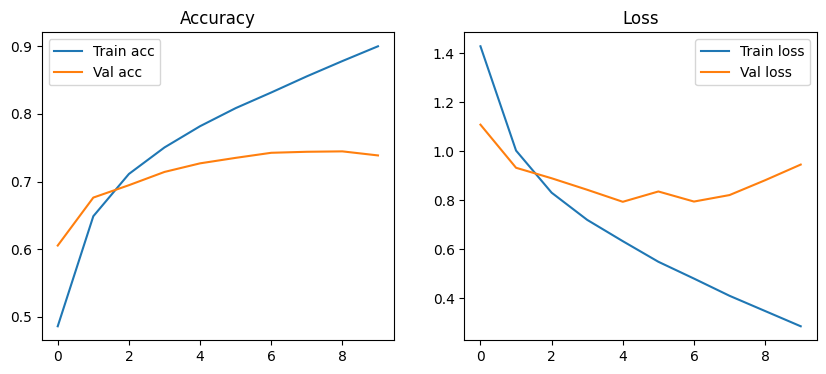

In [32]:
# Plot training history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.title('Loss')

plt.show()